In [1]:
from sklearn import svm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
inputData = pd.read_csv(r'/Users/meryckmucenski/Desktop/CTG1.csv').sample(frac = 1)

inputData.head()
X = inputData.drop(columns=['NSP'])
y = inputData['NSP']

# we're using 80% for training and 20% for testing, but this can change
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [3]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [4]:
predictions = clf.predict(X_test)
# compare the predictions to the known values (y_test)
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.8849765258215962


Confusion matrix, without normalization
[[321  15   1]
 [ 17  32   2]
 [  6   8  24]]
Normalized confusion matrix
[[0.95 0.04 0.  ]
 [0.33 0.63 0.04]
 [0.16 0.21 0.63]]


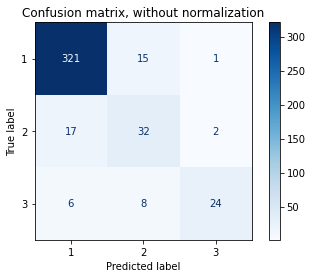

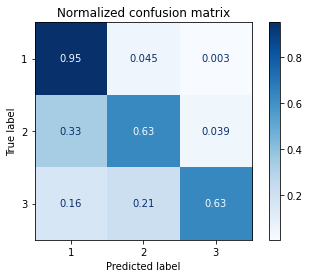

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        #display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()